# Python version of an old lecture. https://github.com/pjreddie/vision-hw0/blob/master/README.md

In [1]:
# Import libraries.
from PIL import Image as PILImage

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define the CharacterImage class and extend it with functions to be used
# on the image.
class CharacterImage:
    def __init__(self, path):
        self.path = path
        # Open image and convert to RGB
        self.pil_img = PILImage.open(path).convert("RGB")
        # Convert to numpy array.
        self.data = np.array(self.pil_img)
        # Get dimensions of the image.
        self.h, self.w, self.c = self.data.shape[0], self.data.shape[1], self.data.shape[2]
        # Transpose the data to CHW format for compatibility with our Image class
        self.data = np.transpose(self.data, (2, 0, 1))
        # Normalize to [0, 1]
        self.data = self.data.astype(float) / 255.0

    def show_with_pil(self):
        self.pil_img.show()

    def show_with_matplotlib(self):
        # Convert CHW to HWC for display
        img_data = np.transpose(self.data, (1, 2, 0))
        plt.imshow(img_data)
        plt.axis('off')
        plt.show()

    def remove_red_channel(self):
        new_data = self.data.copy()
        new_data[0, :, :] = 0
        self.data = new_data

    def convert_to_grayscale(self):
        R = self.data[0, :, :]
        G = self.data[1, :, :]
        B = self.data[2, :, :]
        gray = 0.299 * R + 0.587 * G + 0.114 * B
        self.data = np.array([gray, gray, gray])

    def shift_image_colors(self, c, v):
        self.data[c, :, :] += v
        self.data[c, :, :] = np.clip(self.data[c, :, :], 0, 1)

    def convert_to_hsv(self):
        R, G, B = self.data[0, :, :], self.data[1, :, :], self.data[2, :, :]
        V = np.maximum(R, np.maximum(G, B))
        m = np.minimum(R, np.minimum(G, B))
        C = V - m
        S = np.zeros_like(V)
        mask = V != 0
        S[mask] = C[mask] / V[mask]
        H = np.zeros_like(V)
        mask = C != 0
        H[mask] = np.arctan2(np.sqrt(3) * (G[mask] - B[mask]), 2 * R[mask] - G[mask] - B[mask])
        H = (H + np.pi) / (2 * np.pi)
        self.data = np.array([H, S, V])

    def convert_to_rgb(self):
        H, S, V = self.data[0, :, :], self.data[1, :, :], self.data[2, :, :]
        C = V * S
        Hp = H * 6
        X = C * (1 - np.abs(Hp % 2 - 1))
        R, G, B = np.zeros_like(H), np.zeros_like(H), np.zeros_like(H)

        mask = (0 <= Hp) & (Hp < 1)
        R[mask] = C[mask]
        G[mask] = X[mask]

        mask = (1 <= Hp) & (Hp < 2)
        R[mask] = X[mask]
        G[mask] = C[mask]

        mask = (2 <= Hp) & (Hp < 3)
        G[mask] = C[mask]
        B[mask] = X[mask]

        mask = (3 <= Hp) & (Hp < 4)
        G[mask] = X[mask]
        B[mask] = C[mask]

        mask = (4 <= Hp) & (Hp < 5)
        R[mask] = X[mask]
        B[mask] = C[mask]

        mask = (5 <= Hp) & (Hp < 6)
        R[mask] = C[mask]
        B[mask] = X[mask]

        m = V - C
        R += m
        G += m
        B += m

        self.data = np.array([R, G, B])

    def shift_saturation(self, v):
        self.data[1, :, :] += v
        self.data[1, :, :] = np.clip(self.data[1, :, :], 0, 1)

    def scale_channel(self, c, v):
        self.data[c, :, :] *= v
        self.data[c, :, :] = np.clip(self.data[c, :, :], 0, 1)

    def invert_colors(self):
        self.data = 1 - self.data  # Invert colors

    def add_noise(self, noise_level=0.05):
        noise = np.random.normal(0, noise_level, self.data.shape)
        self.data += noise  # Add noise
        self.data = np.clip(self.data, 0, 1)



Original Image:


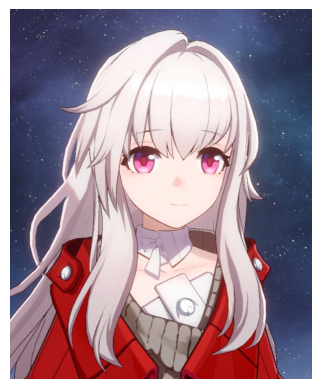

In [3]:
# Load the uploaded image
clara_img_path = '/content/clara.jpg'
clara_custom_img = CharacterImage(clara_img_path)

# Show the image using matplotlib
print("Original Image:")
clara_custom_img.show_with_matplotlib()

Image with no red channel:


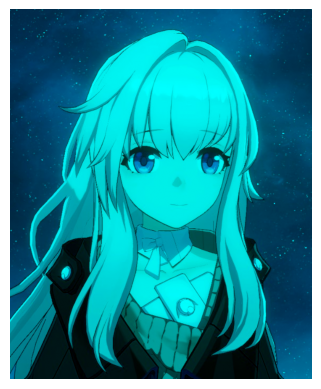

In [4]:
# Test the extended CharacterImage class
clara_character_img = CharacterImage(clara_img_path)

# Remove the red channel and show the image
clara_character_img.remove_red_channel()

print("Image with no red channel:")
clara_character_img.show_with_matplotlib()

Grayscale image:


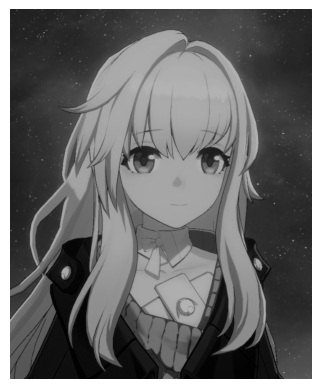

In [5]:
# Convert the image to grayscale and show it
clara_character_img.convert_to_grayscale()
print("Grayscale image:")
clara_character_img.show_with_matplotlib()

Shifted image:


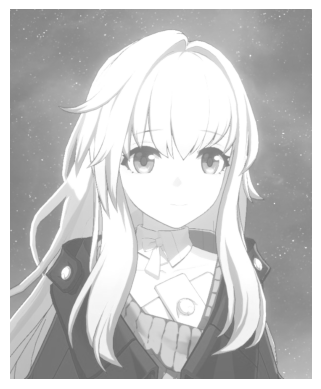

In [6]:
# Shift the image colors by 0.4 in each channel(arbitrary value)
clara_character_img.shift_image_colors(0, 0.4)
clara_character_img.shift_image_colors(1, 0.4)
clara_character_img.shift_image_colors(2, 0.4)

# Show the shifted image
print("Shifted image:")
clara_character_img.show_with_matplotlib()

HSV image:


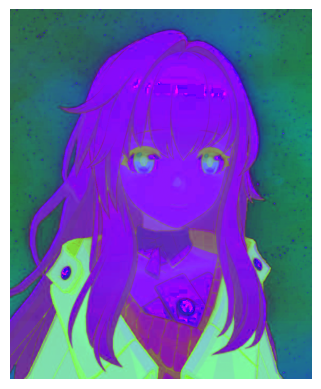

In [7]:
# Reload the original image using the CharacterImage class
clara_character_img = CharacterImage(clara_img_path)

# Convert the image to HSV and show it
clara_character_img.convert_to_hsv()
print("HSV image:")
clara_character_img.show_with_matplotlib()

Image with shifted saturation:


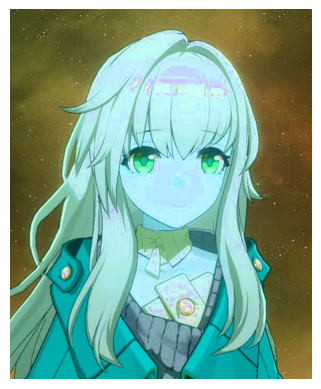

In [8]:
# Reload the original image using the CharacterImage class
clara_character_img = CharacterImage(clara_img_path)

# Convert the image to HSV like we did earlier but now we...
clara_character_img.convert_to_hsv()

# ...shift the saturation by 0.2 (arbitrary value)
clara_character_img.shift_saturation(0.2)

# Convert the image back to RGB
clara_character_img.convert_to_rgb()

# Show the image with shifted saturation
print("Image with shifted saturation:")
clara_character_img.show_with_matplotlib()

Image with scaled saturation:


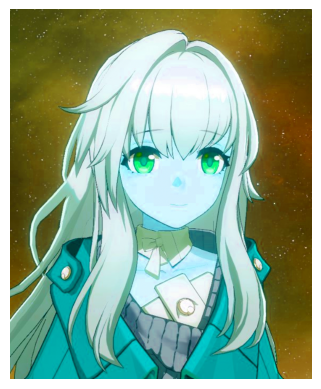

In [9]:
# Reload the original image using the CharacterImage class
clara_character_img = CharacterImage(clara_img_path)

# Convert the image to HSV
clara_character_img.convert_to_hsv()

# Scale the saturation by 2 (arbitrary value)
clara_character_img.scale_channel(1, 2)

# Convert the image back to RGB
clara_character_img.convert_to_rgb()

# Show the image with scaled saturation
print("Image with scaled saturation:")
clara_character_img.show_with_matplotlib()

Image with inverted colors:


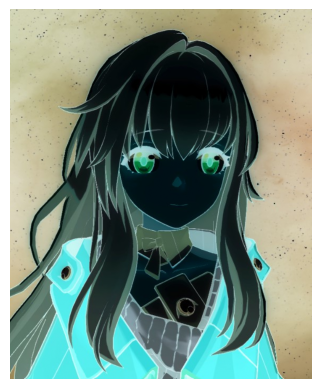

Image with added noise:


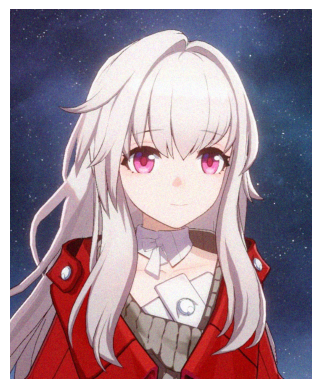

In [10]:
# Reload the original image using the CharacterImage class
clara_character_img = CharacterImage(clara_img_path)

# Invert the colors
clara_character_img.invert_colors()

# Show the image with inverted colors
print("Image with inverted colors:")
clara_character_img.show_with_matplotlib()

# Reload the original image again to reset changes
clara_character_img = CharacterImage(clara_img_path)

# Add random noise
clara_character_img.add_noise()

# Show the image with added noise
print("Image with added noise:")
clara_character_img.show_with_matplotlib()